In [2]:
import os
import cv2
import numpy as np

from matplotlib import pyplot as plt
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from skimage.io import imread

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
IMG_HEIGHT = 128
IMG_WIDTH = 128

image_path = "C:\\Users\\ugur_\\Python Projects\\DATA\\Lung Segmentation\\CXR_png\\"
mask_path = "C:\\Users\\ugur_\\Python Projects\\DATA\Lung Segmentation\\masks\\"

In [1]:
def SaveGeneratedMask(Image_collection_path, save_path, modelName):
    
    test_images = os.listdir(Image_collection_path)
    x = np.zeros((len(test_images), IMG_HEIGHT, IMG_WIDTH))
    
    for i, img_id in enumerate(test_images):
        img_collection = Image_collection_path  + img_id
        
        cv2_image = cv2.imread(img_collection,0)
        cv2_image = cv2.resize(cv2_image, (IMG_HEIGHT, IMG_WIDTH))
        cv2.imwrite('img.jpg', cv2_image)
        img = imread('img.jpg')
        x[i] = img
        os.remove('img.jpg')
    
    model2 = load_model(modelName)
    pred_img = model2.predict(x/255.)*255.0
    
    for j, img_id in enumerate(test_images):   
        new_img_path =save_path + 'mask_' + img_id
        
        dilated = cv2.dilate(pred_img[j].copy(), None, iterations=2) #gray img
        eroded = cv2.erode(dilated.copy(), None, iterations=4) #gray img
        ret, binary_img = cv2.threshold(eroded, 120, 255, cv2.THRESH_BINARY) #binary img
        
        cv2.imwrite(new_img_path, binary_img)


def showRandomPredict(images, masks, predicts, sample_count, if_predicted= False):
    sample_count = sample_count * 4
    plt.figure(figsize=(15, 30))
    for i in range(0, sample_count, 4):
        img_index = random.choice(range(len(images)))
        plt.subplot(5,4,i + 1)
        random_img = images[img_index,:,:]
        random_img = cv2.resize(random_img, (IMG_HEIGHT, IMG_WIDTH))
        plt.imshow(random_img, cmap=plt.cm.bone)
        plt.axis('off')
        plt.title('Lung X-Ray')
        
        plt.subplot(5,4,i + 2)
        random_mask = masks[img_index,:,:]
        random_mask = cv2.resize(random_mask, (IMG_HEIGHT, IMG_WIDTH))
        plt.imshow(random_mask, cmap='gray')
        plt.axis('off')
        plt.title('Mask Ground Truth')
        
        if not if_predicted:
            continue
        random_pred = predicts[img_index,:,:,0]
        plt.subplot(5,4,i + 3)
        plt.imshow(random_pred, cmap='gray')
        plt.axis('off')
        plt.title('Predicted Mask')
        
        plt.subplot(5,4,i + 4)
        plt.imshow(cv2.bitwise_and(images[img_index,:,:], images[img_index,:,:], mask=random_pred.astype(np.uint8)), cmap=plt.cm.bone)
        plt.axis('off')
        plt.title('Predicted Lung Segmentation')
    plt.show()



In [10]:
#DENEME
#read image
img = cv2.imread("C:\\Users\\ugur_\\Python Projects\\LungClassifier\\Predicted Mask2\\mask_00000005_002.png", 0)
#plt.hist(img.flat, bins= 100, range= (0,255))

In [11]:
#DENEME
dilated = cv2.dilate(img.copy(), None, iterations=4) #gray img
eroded = cv2.erode(dilated.copy(), None, iterations=3) #gray img
ret, binary_img = cv2.threshold(eroded, 120, 255, cv2.THRESH_BINARY) #binary img


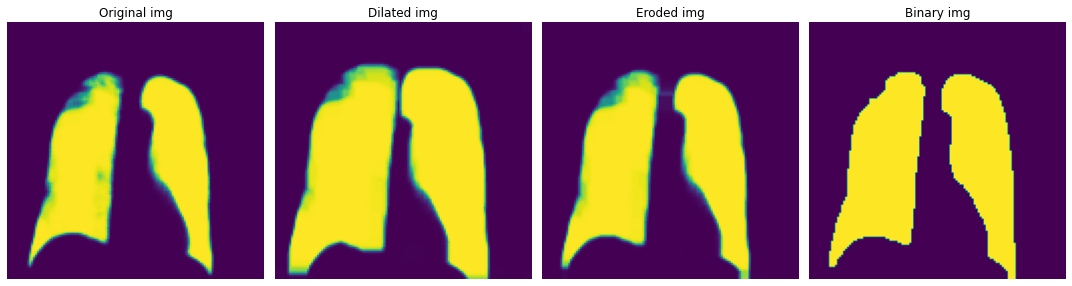

In [12]:
#DENEME
plt.figure(figsize=(15,10))
plt.axis('Off')

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title("Original img")
plt.axis('Off')

plt.subplot(1, 4, 2)
plt.imshow(dilated)
plt.title("Dilated img")
plt.axis('Off')

plt.subplot(1, 4, 3)
plt.imshow(eroded)
plt.title("Eroded img")
plt.axis('Off')

plt.subplot(1, 4, 4)
plt.imshow(binary_img)
plt.title("Binary img")
plt.axis('Off')

plt.tight_layout()
plt.show()